In [3]:
import pandas as pd

# Load the dataset from the uploaded file
file_path = '/content/Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv'  # Update path to your dataset location in Colab

# Loading the dataset with 'ISO-8859-1' encoding to handle special characters
df = pd.read_csv(file_path, encoding='ISO-8859-1')

df.head()


,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,9/7/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,7/12/1912,6:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,8/6/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,9/9/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4998 non-null   object 
 1   Time                   3486 non-null   object 
 2   Location               4994 non-null   object 
 3   Operator               4988 non-null   object 
 4   Flight #               1329 non-null   object 
 5   Route                  4221 non-null   object 
 6   AC Type                4983 non-null   object 
 7   Registration           4724 non-null   object 
 8   cn/ln                  4330 non-null   object 
 9   Aboard                 4980 non-null   float64
 10  Aboard Passangers      4769 non-null   float64
 11  Aboard Crew            4772 non-null   float64
 12  Fatalities             4990 non-null   float64
 13  Fatalities Passangers  4756 non-null   float64
 14  Fatalities Crew        4757 non-null   float64
 15  Grou

In [5]:
# Check for missing values in each column
df.isnull().sum()



,0
Date,0
Time,1512
Location,4
Operator,10
Flight #,3669
Route,777
AC Type,15
Registration,274
cn/ln,668
Aboard,18


In [7]:
# Fill missing values only for numeric columns using the median
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns  # Select only numeric columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Check if the numeric columns have been filled correctly
df[numeric_cols].isnull().sum()


,0
Aboard,0
Aboard Passangers,0
Aboard Crew,0
Fatalities,0
Fatalities Passangers,0
Fatalities Crew,0
Ground,0


In [9]:
# Fill missing values for non-numeric columns (like text columns) with 'Unknown'
categorical_cols = df.select_dtypes(include=['object']).columns  # Select only categorical columns
df[categorical_cols] = df[categorical_cols].fillna('Unknown')

# Check if filled correctly
df[categorical_cols].isnull().sum()

,0
Time,0
Location,0
Operator,0
Flight #,0
Route,0
AC Type,0
Registration,0
cn/ln,0
Summary,0


In [8]:
# Convert 'Date' column to datetime format (adjust the column name if it's different)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Check for any rows where date conversion failed (NaT means Not a Time)
df[df['Date'].isnull()]


,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary


In [10]:
# Total number of crashes
total_crashes = len(df)
print(f"Total number of airplane crashes: {total_crashes}")


Total number of airplane crashes: 4998


In [11]:
# Check the column names related to fatalities and aboard passengers
df.columns  # View column names to identify 'Fatalities' and 'Aboard' columns

# Assuming 'Fatalities' and 'Aboard' columns exist:
# Total fatalities
total_fatalities = df['Fatalities'].sum()

# Total number of people aboard across all crashes
total_aboard = df['Aboard'].sum()

# Survival rate
survival_rate = (1 - (total_fatalities / total_aboard)) * 100

# Output the results
print(f"Total fatalities: {total_fatalities}")
print(f"Total people aboard: {total_aboard}")
print(f"Survival rate: {survival_rate:.2f}%")


Total fatalities: 111732.0
Total people aboard: 155644.0
Survival rate: 28.21%


Crash Frequency Over Time (Trends)

In [12]:
# Extract the year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Group by year and count the number of crashes
crashes_per_year = df.groupby('Year').size()

# Display the crashes per year
crashes_per_year.head()


,0
Year,
1908,1
1909,1
1912,1
1913,3
1915,2


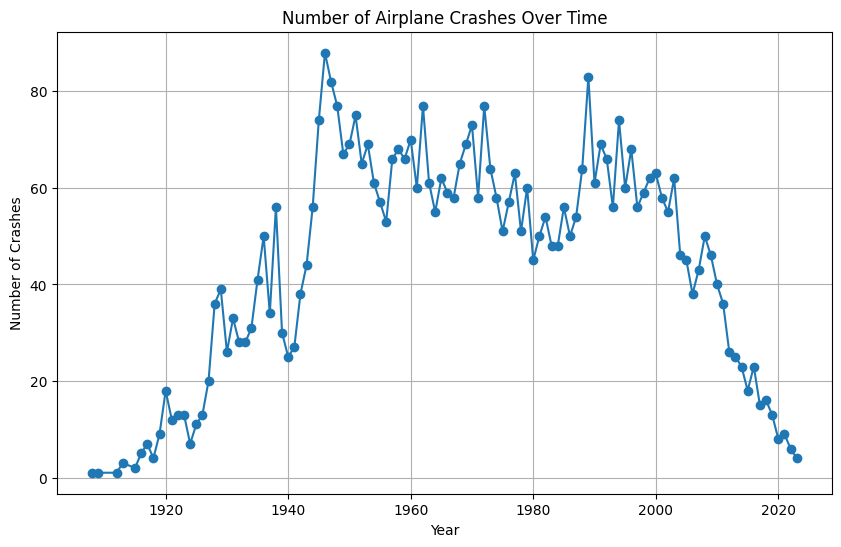

In [13]:
import matplotlib.pyplot as plt

# Plotting the number of crashes over time
plt.figure(figsize=(10, 6))
plt.plot(crashes_per_year.index, crashes_per_year.values, marker='o')
plt.title('Number of Airplane Crashes Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.show()


Distribution of Fatalities

In [15]:

# Mean, median, and standard deviation of fatalities
mean_fatalities = np.mean(df['Fatalities'])
median_fatalities = np.median(df['Fatalities'])
std_fatalities = np.std(df['Fatalities'])

# Output the results
print(f"Mean fatalities per crash: {mean_fatalities:.2f}")
print(f"Median fatalities per crash: {median_fatalities:.2f}")
print(f"Standard deviation of fatalities: {std_fatalities:.2f}")


Mean fatalities per crash: 22.36
Median fatalities per crash: 11.00
Standard deviation of fatalities: 35.03


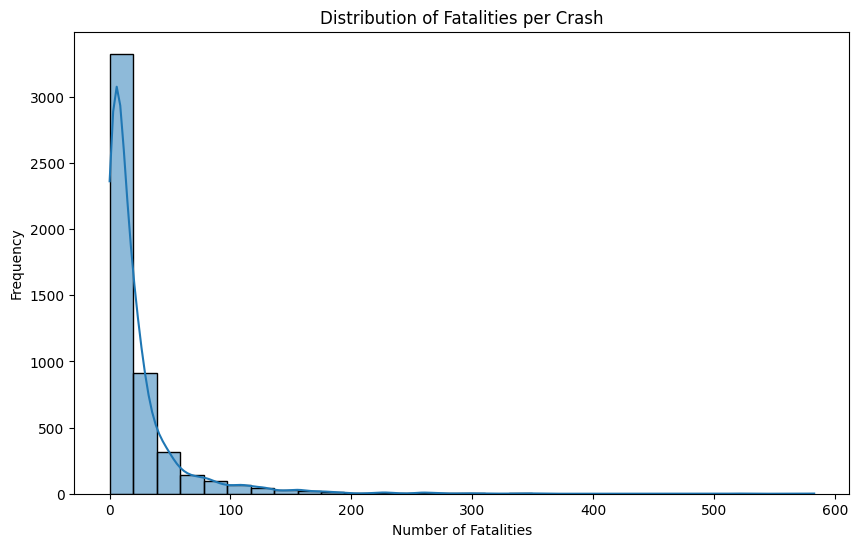

In [16]:
import seaborn as sns

# Plot the distribution of fatalities
plt.figure(figsize=(10, 6))
sns.histplot(df['Fatalities'], bins=30, kde=True)
plt.title('Distribution of Fatalities per Crash')
plt.xlabel('Number of Fatalities')
plt.ylabel('Frequency')
plt.show()


Hypothesis Testing (Comparing Fatalities Across Decades)

In [17]:
# Creating a 'Decade' column by discarding the remainer after dividing by 10
df['Decade'] = (df['Year'] // 10) * 10

# Check the first few values
df[['Year', 'Decade']].head()


,Year,Decade
0,1908,1900
1,1909,1900
2,1912,1910
3,1913,1910
4,1913,1910


In [18]:
from scipy import stats

# Filter data for two decades (e.g., 1970s and 2000s)
fatalities_1970s = df[df['Decade'] == 1970]['Fatalities'].dropna()
fatalities_2000s = df[df['Decade'] == 2000]['Fatalities'].dropna()

# Perform a t-test to compare the means of the two decades
t_stat, p_value = stats.ttest_ind(fatalities_1970s, fatalities_2000s)

# Output the results
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")


T-statistic: 3.93, P-value: 0.0001


**3.93, means that the difference between the two group means (e.g., fatalities in the 1970s vs. 2000s) is 3.93 times the amount of expected random variation (the amount of random noise we expect due to natural variability).**

Visualization


Index(['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'AC Type',
       'Registration', 'cn/ln', 'Aboard', 'Aboard Passangers', 'Aboard Crew',
       'Fatalities', 'Fatalities Passangers', 'Fatalities Crew', 'Ground',
       'Summary', 'Year', 'Decade'],
      dtype='object')


<ipython-input-23-3f724e7af578>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crashes_by_country.index, y=crashes_by_country.values, palette='viridis')


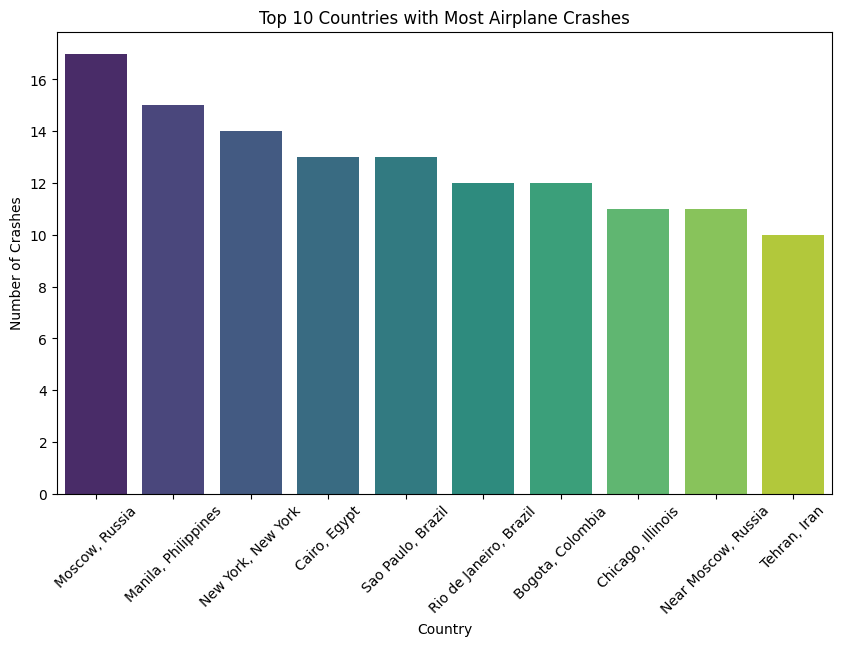

In [23]:
# Bar Chart of Crashes by Region

import seaborn as sns
import matplotlib.pyplot as plt

# Check for possible column names related to 'Country'
# and correct the column name in the code below if necessary.
print(df.columns)

# Count the number of crashes by country (or region)
crashes_by_country = df['Location'].value_counts().head(10)  # Show top 10 countries for clarity

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=crashes_by_country.index, y=crashes_by_country.values, palette='viridis')
plt.title('Top 10 Countries with Most Airplane Crashes')
plt.xlabel('Country')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

 Box Plot of Fatalities by Decade

<ipython-input-25-f42eac83dd74>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Decade', y='Fatalities', data=df, palette='coolwarm')


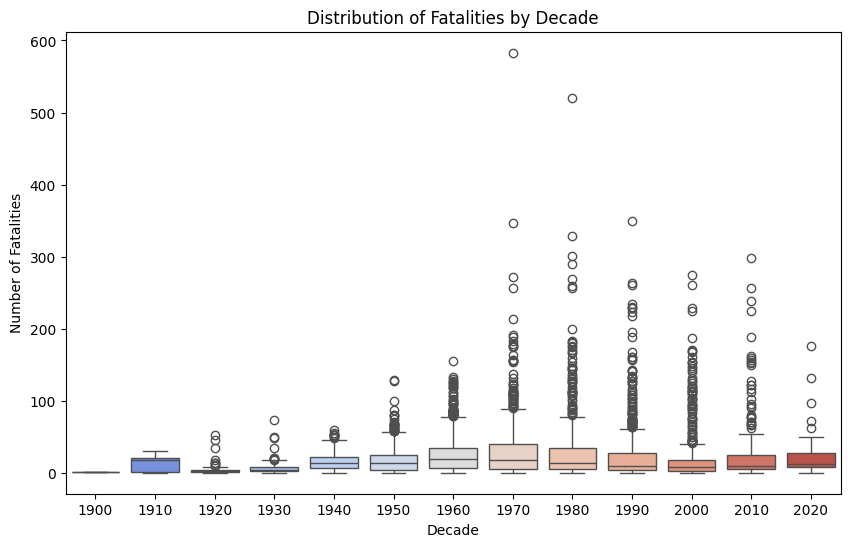

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Decade', y='Fatalities', data=df, palette='coolwarm')
plt.title('Distribution of Fatalities by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Fatalities')
plt.show()


Analysis

Decline in Crashes and Fatalities
Both the frequency of crashes and the average number of fatalities per crash have decreased significantly over time, particularly from the 1970s onwards. This is consistent with the rapid advancements in aviation safety, training, and technology over the past few decades.

High-Fatality Outliers
Some crashes still result in very high numbers of fatalities, likely due to major accidents involving large commercial airliners. These outliers indicate that, despite the improvements, the impact of rare catastrophic events is still significant.

Regional Differences
Some countries have notably higher crash frequencies. This may be tied to geopolitical factors, air traffic volume, or weather conditions. Countries with lower safety regulations or more difficult flying conditions (e.g., mountains, frequent storms) might also experience more crashes.